In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(data_url)

In [5]:
# Basic exploration
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Handle Missing Values
age_mean = titanic['Age'].mean()
titanic['Age'] = titanic['Age'].fillna(age_mean)

In [10]:
# Replace missing values in 'Grade' with the mode
Cabin_mode = titanic['Cabin'].mode()[0]
titanic['Cabin'] = titanic['Cabin'].fillna('cabin_mode')

In [11]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [12]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

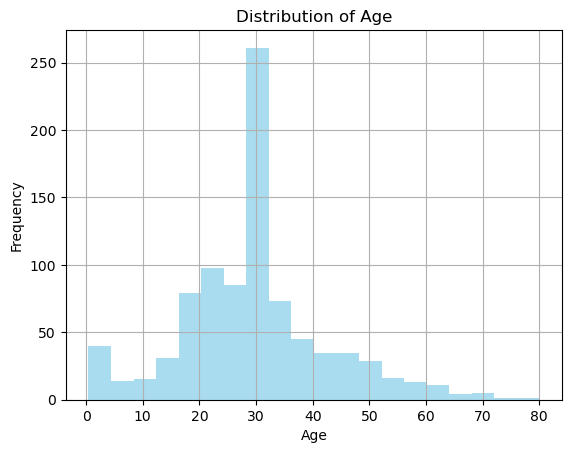

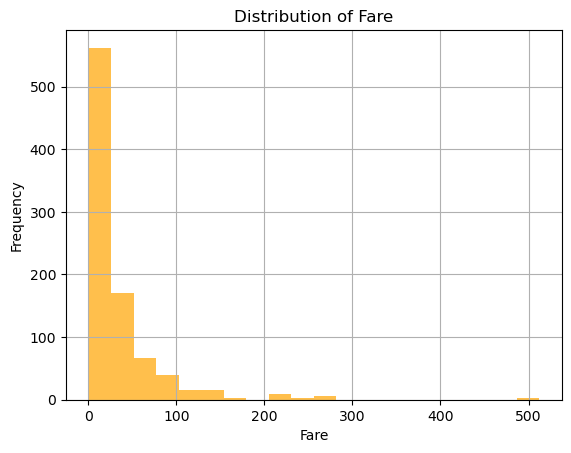

In [13]:
# Histogram for 'Age' and 'Fare'
titanic['Age'].hist(bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

titanic['Fare'].hist(bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

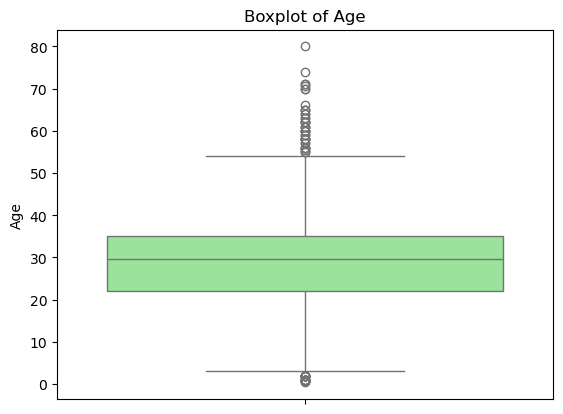

In [14]:
# Boxplot for 'Age'
sns.boxplot(y=titanic['Age'], color='lightgreen')
plt.title('Boxplot of Age')
plt.show()

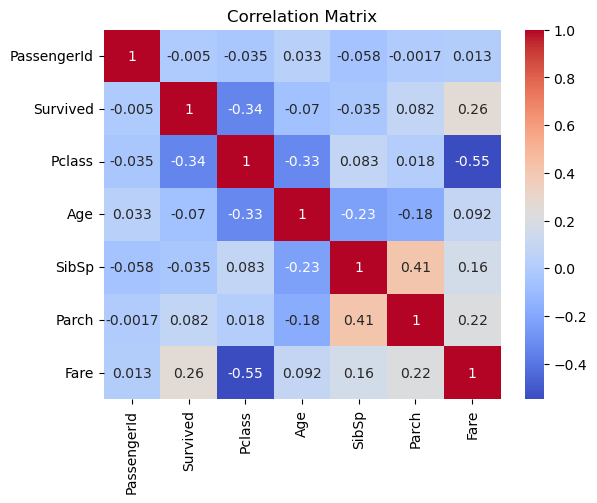

In [16]:
# Correlation analysis for numerical features
numerical_cols = titanic.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = titanic[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Save the cleaned Titanic dataset
titanic.to_csv('cleaned_titanic.csv', index=False)

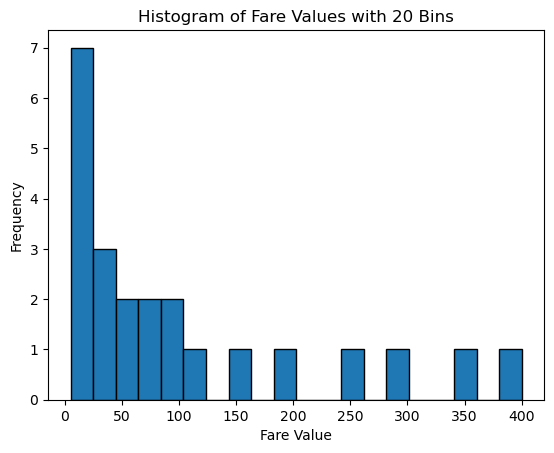

In [26]:
import matplotlib.pyplot as plt

# Sample data (Fare values)
fare_values = [5, 7, 8, 10, 14, 15, 20, 25, 30, 35, 50, 60, 65, 80, 90, 100, 120, 150, 200, 250, 300, 350, 400]

# Create histogram with 20 bins
plt.hist(fare_values, bins=20, edgecolor='black')

# Add labels and title for clarity
plt.xlabel('Fare Value')
plt.ylabel('Frequency')
plt.title('Histogram of Fare Values with 20 Bins')

# Show the plot
plt.show()


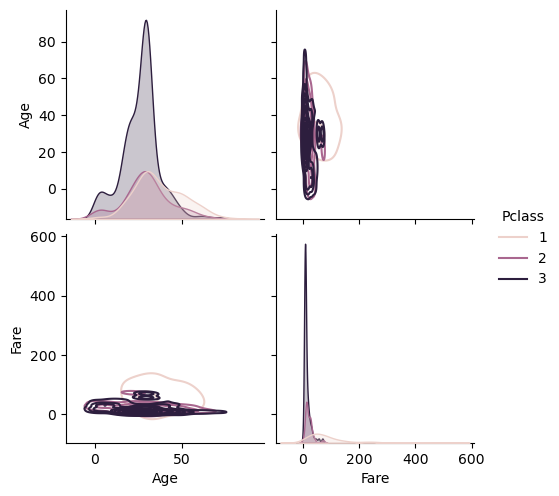

In [28]:
sns.pairplot(titanic[['Age', 'Fare', 'Pclass']], kind = 'kde', hue='Pclass')
plt.show()

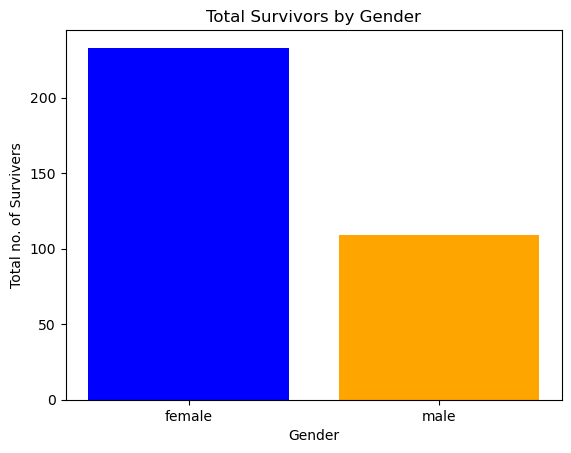

In [29]:
survival = titanic.groupby('Sex')['Survived'].sum()

#plot the bar chart
plt.bar(survival.index, survival.values, color=['blue', 'orange'])

#labels and title
plt.title('Total Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Total no. of Survivers')

# show the chart
plt.show()

In [30]:
survival

Sex
female    233
male      109
Name: Survived, dtype: int64

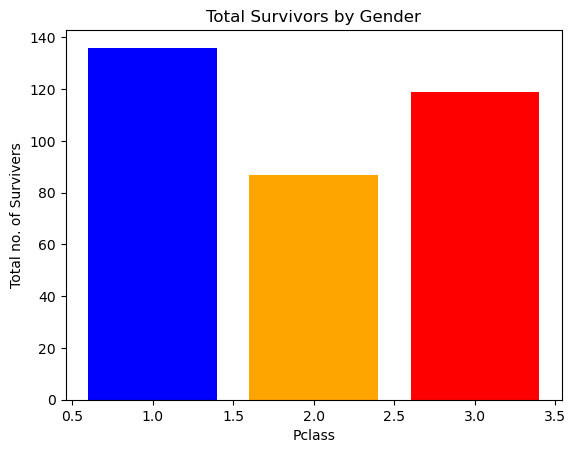

In [33]:
survival = titanic.groupby('Pclass')['Survived'].sum()

#plot the bar chart
plt.bar(survival.index, survival.values, color=['blue', 'orange', 'red'])

#labels and title
plt.title('Total Survivors by Gender')
plt.xlabel('Pclass')
plt.ylabel('Total no. of Survivers')

# show the chart
plt.show()

In [34]:
survival

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [56]:
Embarked_count = titanic.groupby('Pclass')['Survived'].sum()

In [58]:
Embarked_count

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

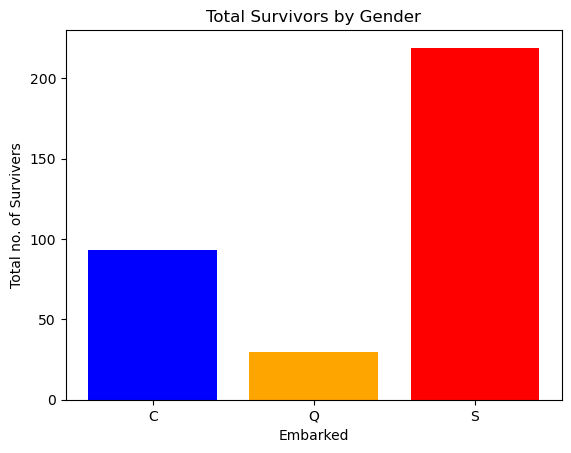

In [69]:
Embarked_count = titanic.groupby('Embarked')['Survived'].sum()

#plot the bar chart
plt.bar(Embarked_count.index, Embarked_count.values, color=['blue', 'orange', 'red'])

#labels and title
plt.title('Total Survivors by Gender')
plt.xlabel('Embarked')
plt.ylabel('Total no. of Survivers')

# show the chart
plt.show()

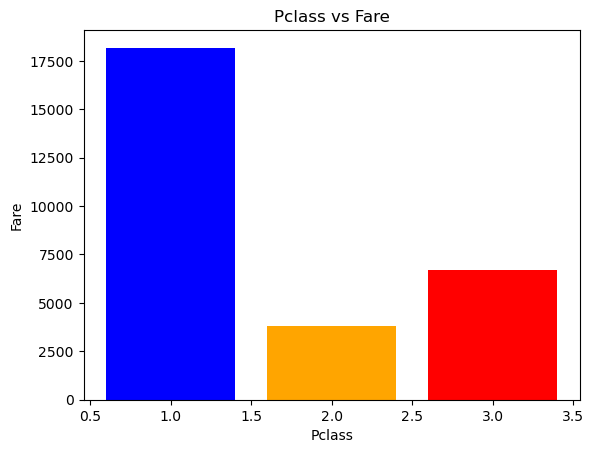

In [71]:
fare_count = titanic.groupby('Pclass')['Fare'].sum()

#plot the bar chart
plt.bar(fare_count.index, fare_count.values, color=['blue', 'orange', 'red'])

#labels and title
plt.title('Pclass vs Fare')
plt.xlabel('Pclass')
plt.ylabel('Fare')

# show the chart
plt.show()

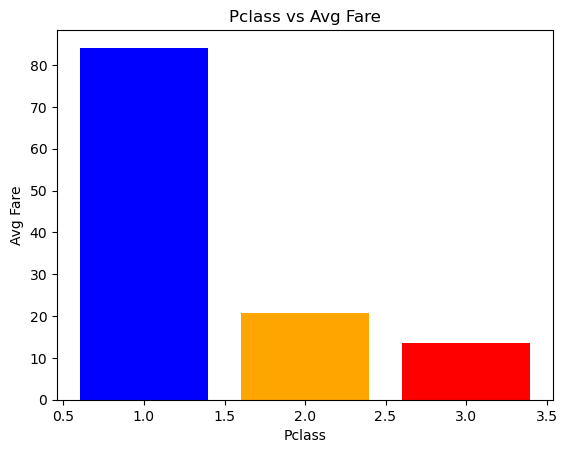

In [73]:
avg_fare_count = titanic.groupby('Pclass')['Fare'].mean()

#plot the bar chart
plt.bar(avg_fare_count.index, avg_fare_count.values, color=['blue', 'orange', 'red'])

#labels and title
plt.title('Pclass vs Avg Fare')
plt.xlabel('Pclass')
plt.ylabel('Avg Fare')

# show the chart
plt.show()